In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
file_name = "Log returns .csv"
df = pd.read_csv(file_name)
print(df)

Saving Log returns .csv to Log returns .csv
     Unnamed: 0       BTC       ETH
0    12/31/2018 -0.040653 -0.057338
1      1/1/2019  0.039229  0.066670
2      1/2/2019  0.016204  0.090924
3      1/3/2019 -0.025809 -0.040519
4      1/4/2019  0.010956  0.040081
..          ...       ...       ...
394   1/29/2020 -0.011010 -0.011679
395   1/30/2020  0.022367  0.058923
396   1/31/2020 -0.017096 -0.026763
397    2/1/2020  0.005135  0.022159
398    2/2/2020 -0.006410  0.025335

[399 rows x 3 columns]


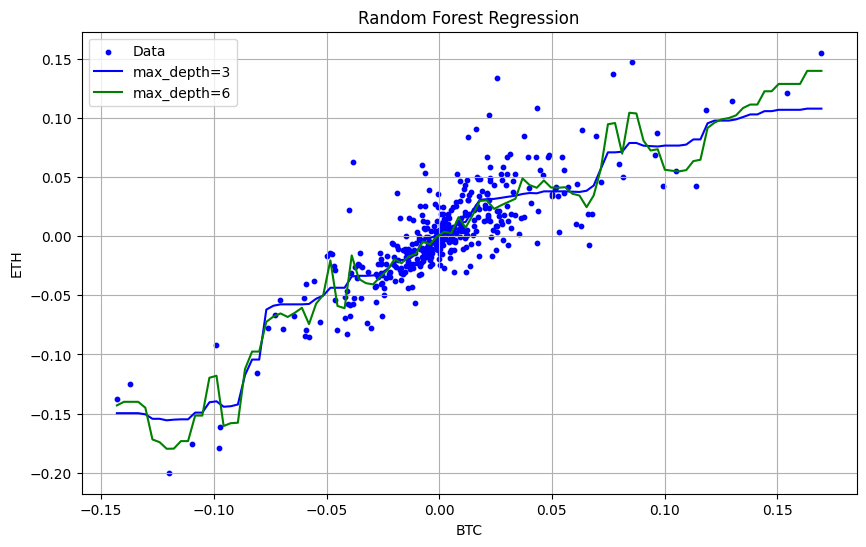

In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
btc = df['BTC'].values.reshape(-1, 1)  # Feature (X)
eth = df['ETH'].values  # Target (y)
model_3 = RandomForestRegressor(max_depth=3, random_state=0)
model_3.fit(btc, eth)
model_6 = RandomForestRegressor(max_depth=6, random_state=0)
model_6.fit(btc, eth)
x_range = np.linspace(btc.min(), btc.max(), 100).reshape(-1, 1)
y_pred_3 = model_3.predict(x_range)
y_pred_6 = model_6.predict(x_range)
plt.figure(figsize=(10, 6))

plt.scatter(btc, eth, color='blue', label='Data', s=10)

plt.plot(x_range, y_pred_3, color='blue', label='max_depth=3')

plt.plot(x_range, y_pred_6, color='green', label='max_depth=6')

plt.title("Random Forest Regression")
plt.xlabel("BTC")
plt.ylabel("ETH")
plt.legend()

plt.grid(True)
plt.show()

# Explain which model is better

The model with max_depth=3 has higher bias but lower variance because it is simpler
and less likely to overfit the data. However, it may not capture complex patterns.

The model with max_depth=6 has lower bias but higher variance because it is more complex
and can fit the training data better. However, it risks overfitting, especially if the data
is noisy or limited.

To determine which model is better, we need to evaluate their performance on testing data using metrics
like Mean Squared Error (MSE).


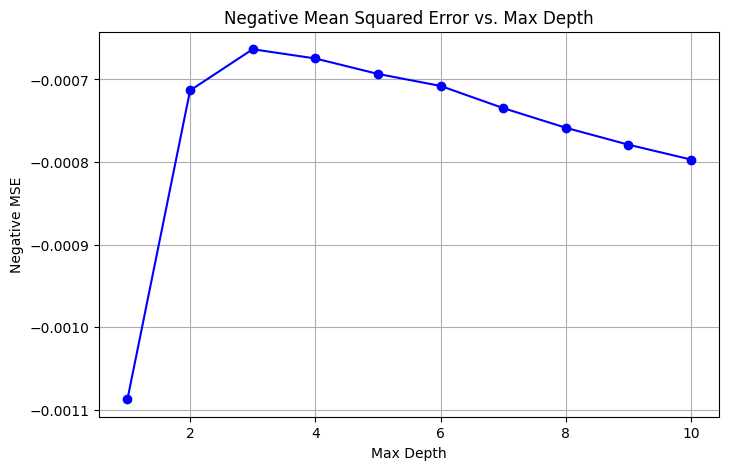

In [5]:
from sklearn.model_selection import cross_val_score
max_depths = range(1, 11)
negative_mse_scores = []
for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=0)
    scores = cross_val_score(model, btc, eth, cv=5, scoring='neg_mean_squared_error')
    negative_mse_scores.append(scores.mean())
plt.figure(figsize=(8, 5))
plt.plot(max_depths, negative_mse_scores, marker='o', color='blue')
plt.title("Negative Mean Squared Error vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Negative MSE")
plt.grid(True)
plt.show()